# 1.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [5]:
%matplotlib inline
import pandas as pd
pd.__version__

'0.25.1'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [6]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Часть 1 (13 баллов)

1) Выведите последние 10 элеметнов датасета (1 балл)

In [9]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете? (1 балл)

In [65]:
print("Колонок -", len(df.columns), ", cтрок -", len(df.index) )
df.shape


Колонок - 15 , cтрок - 32561


(32561, 15)

3) Какие типы данных у элементов этого датасета? (1 балл)

In [24]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски? (1 балл)

In [87]:
print((df == ' ?').sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже. (3 балла)

Ваш ответ: в workclass - безраотные(возможно маргиналы),
в occupation - представлены не все профессии(возможно малочисленные),
в native.country - представлены не все страны(возможно малочисленные)

6) Какие и сколько различных рабочих классов workclass представлено в выборке? (2 балла)

In [44]:
df["workclass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

7) Какой средний возраст женщин и мужчин? (1 балл)

In [86]:
print("Средний возраст женщин -", df[df['sex'] == ' Female']['age'].mean(), ", средний возраст мужчин -", df[df['sex'] == ' Male']['age'].mean())

Средний возраст женщин - 36.85823043357163 , средний возраст мужчин - 39.43354749885268


8) Постройте гистограмму(bar) распределения образования людей (education) (2 балла)

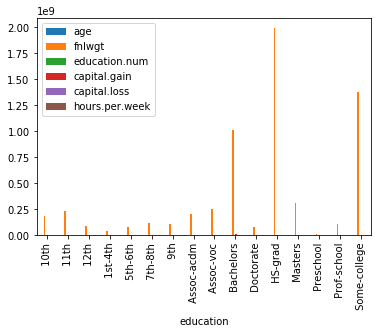

In [107]:
df.groupby('education').sum().plot(kind = "bar")

## Часть 2 (18 баллов)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? (2 балла)

In [95]:
print("50K > :", 'среднее значение -', df[df['income'] == ' >50K']['age'].mean(), ', среднеквадротичное отклонение -', df[df['income'] == ' >50K']['age'].std())
print("50K <= :",'среднее значение -', df[df['income'] == ' <=50K']['age'].mean(), ', среднеквадротичное отклонение -', df[df['income'] == ' <=50K']['age'].std())

50K > : среднее значение - 44.24984058155847 , среднеквадротичное отклонение - 10.519027719851826
50K <= : среднее значение - 36.78373786407767 , среднеквадротичное отклонение - 14.02008849082488


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate) (2 балла)

In [15]:
df[df['income'] == ' >50K'].groupby('education')['income'].count()
print("Нет, не правда")

education
 10th              62
 11th              60
 12th              33
 1st-4th            6
 5th-6th           16
 7th-8th           40
 9th               27
 Assoc-acdm       265
 Assoc-voc        361
 Bachelors       2221
 Doctorate        306
 HS-grad         1675
 Masters          959
 Prof-school      423
 Some-college    1387
Name: income, dtype: int64

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми. (2 балла)

In [32]:
a = df[(df['sex'] == ' Male') & ((df['marital.status'] == ' Married-civ-spouse') | (df['marital.status'] == ' Married-spouse-absent') | (df['marital.status'] == ' Married-AF-spouse')) & (df['income'] == ' >50K')]['income'].count()
b = df[(df['sex'] == ' Male') & ((df['marital.status'] != ' Married-civ-spouse') & (df['marital.status'] != ' Married-spouse-absent') & (df['marital.status'] != ' Married-AF-spouse')) & (df['income'] == ' >50K')]['income'].count()
if a > b:
    print("Больше среди женатых")
else:
    print("Больше среди холостых")

Больше среди женатых


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country). (3 балла)

In [38]:
print('Зарабатывают мало: ')
print(df[df['income'] == ' <=50K'].groupby('native.country')['hours.per.week'].mean())
print('Зарабатывают много: ')
print(df[df['income'] == ' >50K'].groupby('native.country')['hours.per.week'].mean())

Зарабатывают мало: 
native.country
 ?                             40.164760
 Cambodia                      41.416667
 Canada                        37.914634
 China                         37.381818
 Columbia                      38.684211
 Cuba                          37.985714
 Dominican-Republic            42.338235
 Ecuador                       38.041667
 El-Salvador                   36.030928
 England                       40.483333
 France                        41.058824
 Germany                       39.139785
 Greece                        41.809524
 Guatemala                     39.360656
 Haiti                         36.325000
 Holand-Netherlands            40.000000
 Honduras                      34.333333
 Hong                          39.142857
 Hungary                       31.300000
 India                         38.233333
 Iran                          41.440000
 Ireland                       40.947368
 Italy                         39.625000
 Jamaica              

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам. (4 балла)

In [204]:
dop_df = pd.DataFrame(columns = ['education', 'capital.loss', 'capital.gain'])
dop_df['education'] = df['education']
dop_df['capital.loss'] = round(9 * df['capital.loss']/df['capital.loss'].max())
dop_df['capital.gain'] = round(20 * df['capital.gain']/df['capital.gain'].max())
print(dop_df.groupby('education').count())
print(dop_df.groupby('capital.loss').count())
print(dop_df.groupby('capital.gain').count())

               capital.loss  capital.gain
education                                
 10th                   933           933
 11th                  1175          1175
 12th                   433           433
 1st-4th                168           168
 5th-6th                333           333
 7th-8th                646           646
 9th                    514           514
 Assoc-acdm            1067          1067
 Assoc-voc             1382          1382
 Bachelors             5355          5355
 Doctorate              413           413
 HS-grad              10501         10501
 Masters               1723          1723
 Preschool               51            51
 Prof-school            576           576
 Some-college          7291          7291
              education  capital.gain
capital.loss                         
0.0               31047         31047
1.0                  21            21
2.0                  19            19
3.0                 353           353
4.0             

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще. (2 балла)

In [108]:
print((df[(df['income'] == ' >50K') & (df['sex'] == ' Female')].groupby('native.country')['income'].count()/df[df['sex'] == ' Female'].groupby('native.country')['income'].count()).idxmax())

 Yugoslavia


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary (3 балла)

In [151]:
import random, numpy as np
magic_salary = []
for i in df['income']:
    if i == ' <=50K':
        magic_salary.append(random.randint(0, 50))
    else:
        magic_salary.append(random.randint(51, 200))
df['magic_salary'] = magic_salary
df.groupby('education')['magic_salary'].mean() / df.groupby('education')['hours.per.week'].mean()

education
 10th            0.885623
 11th            0.887665
 12th            0.936229
 1st-4th         0.794616
 5th-6th         0.740523
 7th-8th         0.758916
 9th             0.813347
 Assoc-acdm      1.237494
 Assoc-voc       1.212500
 Bachelors       1.575259
 Doctorate       2.170155
 HS-grad         1.006304
 Masters         1.886787
 Preschool       0.678973
 Prof-school     2.076692
 Some-college    1.138902
dtype: float64

SyntaxError: invalid syntax (<ipython-input-140-588ee84bfcaa>, line 5)